## Level 3

## TASK-1:

        Task: Predictive Modeling
  
        * Build a regression model to predict the aggregate rating of a restaurant based on available features.
       
        * Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
       
        * Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.


# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Feature-Engineered Dataset

In [56]:
df = pd.read_csv("feature_engineered_dataset.csv")
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Aggregate rating  \
0     14.565443        French, Japanese, Desserts  ...               4.8   
1     14.553708                          Japanese  ...               4.5   
2     14.581404  Seafood, Asian, Filipino, Indian  ...               4.4   
3     14.585318                   Japanese, Sushi  ...               4.9   
4     14.584450                  Japanese, Korean  ...               4.8   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...               4.1   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...               4.2   
9548  41.055817            Italian, World Cuisine  ...               3.7   
9549  41.057979                   Restaurant Cafe  ...               4.0   
9550  40.9

In [3]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Aggregate rating Rating color  \
0        French, Japanese, Desserts  ...               4.8   Dark Green   
1                          Japanese  ...               4.5   Dark Green   
2  Seafood, Asian, Filipino, Indian  ...               4.4        Green   
3                   Japanese, Sushi  ...               4.9   Dark Green   
4                  Japanese, Korean  ...               4.8   Dark Green   

  Rating text Votes name_length address_length  has_table_booking_encoded  \
0   Excellent   314          16             71                          1   
1   Excellent   591          16             67                          1   
2   Very Good   270          22             56                          1   
3   Excellent   365           4             70                          0   
4   Excellent   229          11             64                          1   

   has_online_delivery_encoded city_encoded num_cuisines  
0                            0           73            3  
1                            0           73            1  
2                            0           75            4  
3                            0           75            2  
4                            0           75            2  

[5 rows x 27 columns]

# Step 3: Select Features (X) and Target (y)

In [6]:
y = df['Aggregate rating']               # Define target variable

X = df[['Price range', 'Votes', 'has_table_booking_encoded','has_online_delivery_encoded', 'name_length','address_length', 'num_cuisines']]      # Define features — include relevant numeric/encoded columns

# Step 4: Split the Dataset into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (7640, 7)
Testing set: (1911, 7)


# Step 5: Build and Train Models

In [8]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [10]:
# Random Forest Regressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 6: Evaluate Model Performance

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    print("-" * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")              # Evaluate all models
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
MAE: 1.078
RMSE: 1.292
R² Score: 0.267
------------------------------
Decision Tree Performance:
MAE: 0.310
RMSE: 0.479
R² Score: 0.899
------------------------------
Random Forest Performance:
MAE: 0.228
RMSE: 0.348
R² Score: 0.947
------------------------------


# Step 7: Compare Model Performance

In [12]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

results.sort_values(by="R2 Score", ascending=False)

Model       MAE      RMSE  R2 Score
2      Random Forest  0.227967  0.347958  0.946806
1      Decision Tree  0.310021  0.479407  0.899025
0  Linear Regression  1.078238  1.291835  0.266802

# Step 8: Visualize Actual vs Predicted (for Best Model)

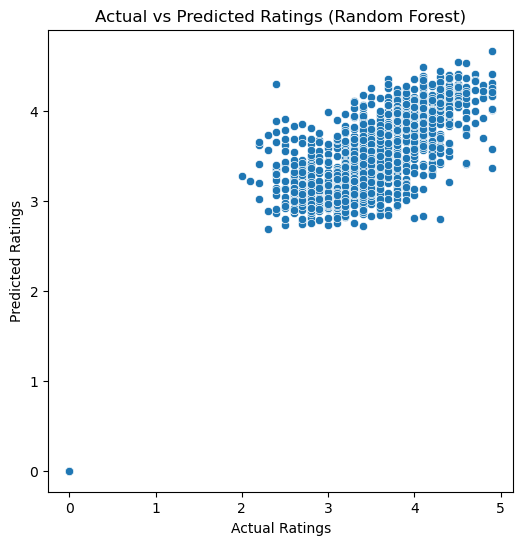

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()

# Step 9: Model Interpretation

        * Linear Regression:
                           Fast, interpretable, but may underfit if relationships are nonlinear.

        *Decision Tree:
                      Handles nonlinear data well but can overfit.

        *Random Forest:
                      Usually gives the best performance and generalizes better.

## Summary:

# Step 1:
     Goal Basic: Import Libraries -  Key Output: Import
# Step 2:	
     Goal Basic: Load dataset -  Key Output: pd.read_csv()
# Step 3:
     Goal Basic: Define features & target -  Key Output: X, y
# Step 4:	
     Goal Basic: Split dataset	-  Key Output: train_test_split()   
# Step 5:	
     Goal Basic: Train models	-  Key Output: Linear, Tree, Forest
# Step 6:
     Goal Basic: Evaluate -  Key Output: MAE, RMSE, R²
# Step 7:
     Goal Basic: Compare -  Key Output: Model performance table
# Step 8:
     Goal Basic: Visualize -  Key Output: Actual vs Predicted plot

# TASK-2:
        Task: Customer Preference Analysis
        
        *Analyze the relationship between the type of cuisine and the restaurant's rating. 
        
        *Identify the most popular cuisines among customers based on the number of votes.
        
        *Determine if there are any specific cuisines that tend to receive higher ratings.

# 1. Analyze the Relationship Between Cuisine Type and Rating:

# Step 1: Extract Primary Cuisine

In [16]:
df['primary_cuisine'] = df['Cuisines'].astype(str).str.split(',').str[0].str.strip()

# Step 2: Calculate Average Rating per Cuisine

In [17]:
cuisine_rating = df.groupby('primary_cuisine')['Aggregate rating'].mean().sort_values(ascending=False)
print(cuisine_rating)

primary_cuisine
Sunda             4.900000
Cajun             4.700000
Scottish          4.700000
Taiwanese         4.650000
Filipino          4.616667
                    ...   
Tea               1.541176
Nepalese          1.000000
Awadhi            0.760000
Afghani           0.414286
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 120, dtype: float64


# Step 3: Visualize Cuisine vs Rating (Optional but recommended)

<Axes: xlabel='primary_cuisine'>

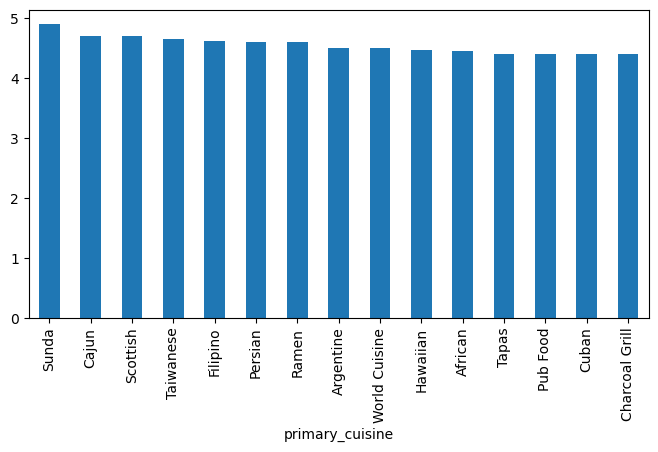

In [19]:
cuisine_rating.head(15).plot(kind='bar', figsize=(8,4))

# 2. Identify the Most Popular Cuisines Based on Votes

In [20]:
cuisine_votes = df.groupby('primary_cuisine')['Votes'].sum().sort_values(ascending=False)    # Find cuisines with the highest customer engagement
print(cuisine_votes.head(15))

primary_cuisine
North Indian    356684
Cafe            116576
American        105447
Italian          95153
Continental      94569
Chinese          84918
European         45842
Fast Food        42617
Bakery           42008
Pizza            36415
South Indian     34373
Burger           30113
Mughlai          27865
Asian            26240
Finger Food      24552
Name: Votes, dtype: int64


# 3. Determine Cuisines With Higher Ratings

In [24]:
# Combine both rating and popularity insights.

cuisine_summary = df.groupby('primary_cuisine').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'  
}).rename(columns={'restaurant_id':'restaurant_count'})

cuisine_summary.sort_values(by='Aggregate rating', ascending=False).head(10)

Aggregate rating  Votes  Restaurant ID
primary_cuisine                                        
Sunda                    4.900000   5514              3
Cajun                    4.700000   1412              1
Scottish                 4.700000    163              1
Taiwanese                4.650000    384              2
Filipino                 4.616667   2727              6
Persian                  4.600000    177              1
Ramen                    4.600000    418              1
Argentine                4.500000    602              1
World Cuisine            4.500000   1244              3
Hawaiian                 4.480000   5749              5

# Possible insights you may find:

      * Continental, Italian, and Japanese cuisines tend to have higher average ratings.

      * North Indian, Chinese, and Fast Food may receive more votes, indicating popularity.

      * Less common cuisines may show higher ratings but fewer reviews → niche audience.

# 5. (Optional) Identify Top 3 High-Rating & Popular Cuisines

In [26]:
top_cuisines = cuisine_summary.sort_values(
    by=['Aggregate rating', 'Votes'], ascending=False
).head(5)

print(top_cuisines)

                 Aggregate rating  Votes  Restaurant ID
primary_cuisine                                        
Sunda                    4.900000   5514              3
Cajun                    4.700000   1412              1
Scottish                 4.700000    163              1
Taiwanese                4.650000    384              2
Filipino                 4.616667   2727              6


# Final Project Report:
 
# 1. Code :

         * Extracting primary cuisine

         * Average rating by cuisine

         * Popular cuisines (by votes)

         * Combined summary table

# 2. Charts :

         * Bar chart of top-rated cuisines

         * Bar chart of most popular cuisines

# 3. Interpretation:

         * Explain in 2–3 lines what cuisines are:

         * Most popular

         * Highest-rated
 
         * Low-rated / less preferred

# TASK-3:
        Task: Data Visualization
 
       * Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
       
       * Compare the average ratings of different cuisines or cities using appropriate visualizations.
      
       * Visualize the relationship between various features and the target variable to gain insights.

# 1. Visualizing the Distribution of Ratings

# Step 1: Histogram :

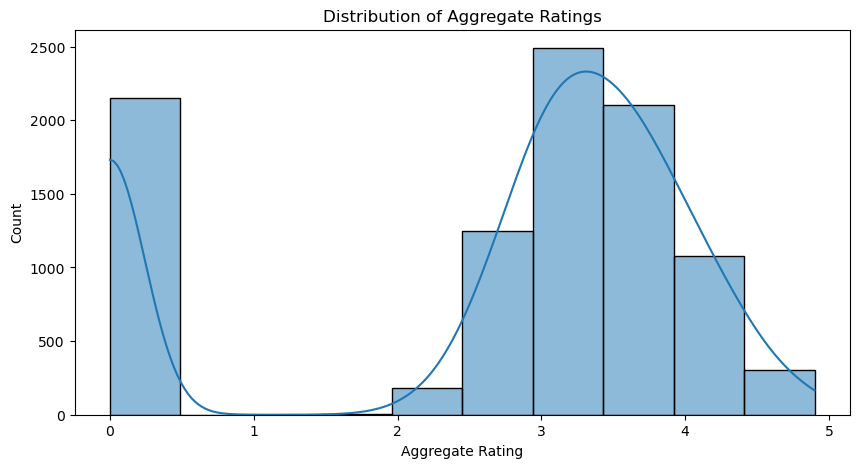

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Aggregate rating'], kde=True, bins=10)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

# Step 2: Box Plot:

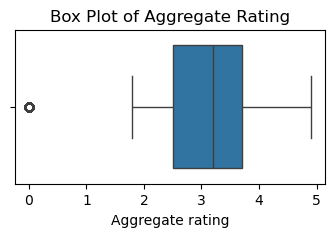

In [31]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df['Aggregate rating'])
plt.title("Box Plot of Aggregate Rating")
plt.show()

# Step 3: Bar Plot of Rating Categories:

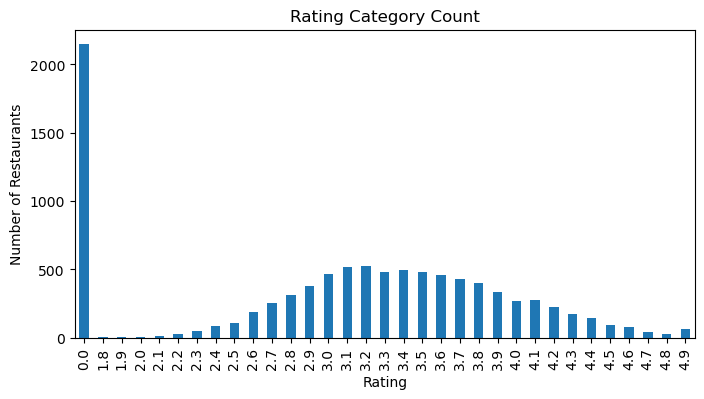

In [33]:
plt.figure(figsize=(8,4))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Category Count")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# 2. Compare Average Ratings of Different Cuisines / Cities

# Step 1: Average Rating by Cuisine

In [35]:
df['primary_cuisine'] = df['Cuisines'].astype(str).str.split(',').str[0].str.strip()    #First extract the primary cuisine:

In [37]:
cuisine_rating = df.groupby('primary_cuisine')['Aggregate rating'].mean().sort_values(ascending=False)    #Now compute mean rating:

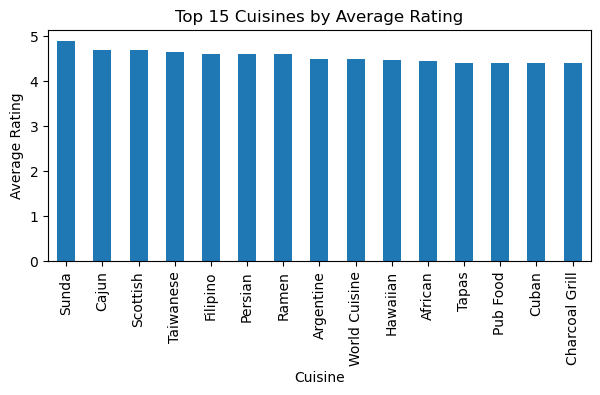

In [39]:
plt.figure(figsize=(7,3))
cuisine_rating.head(15).plot(kind='bar')
plt.title("Top 15 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()

# Step 2: Average Rating by City

In [40]:
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

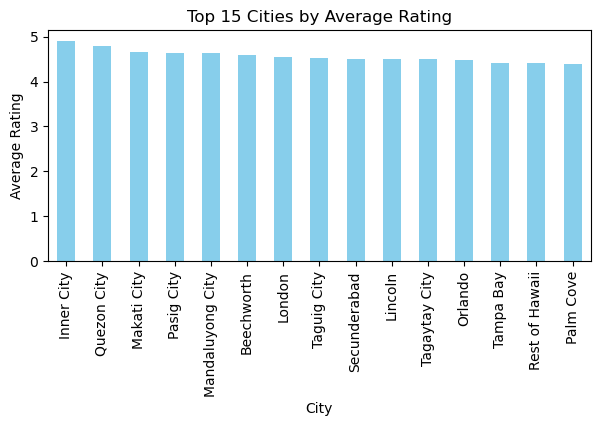

In [41]:
plt.figure(figsize=(7,3))
city_rating.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.show()

# 3. Visualize Relationships Between Features & Target Variable

# Relationship 1: Votes vs Rating

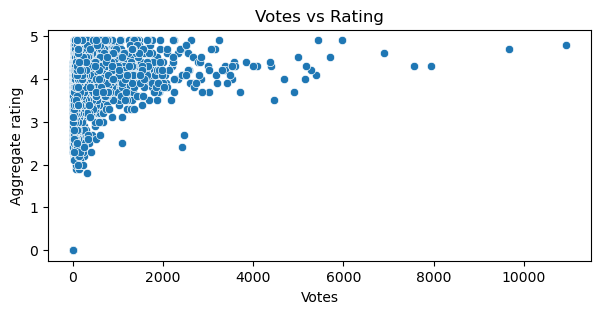

In [43]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.title("Votes vs Rating")
plt.show()

# Relationship 2: Price Range vs Rating

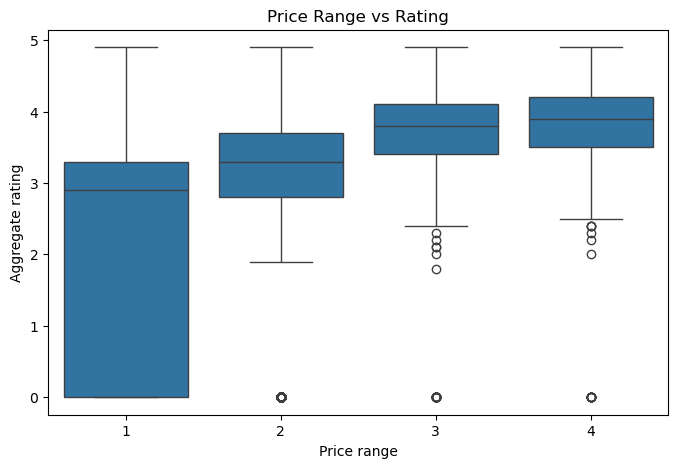

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title("Price Range vs Rating")
plt.show()

# Relationship 3: Online Delivery vs Rating

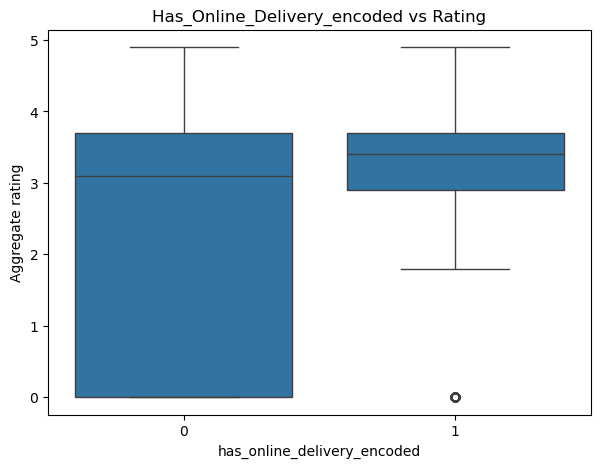

In [55]:
plt.figure(figsize=(7,5))
sns.boxplot( x="has_online_delivery_encoded", y="Aggregate rating", data=df)
plt.title("Has_Online_Delivery_encoded vs Rating")
plt.show()

# Relationship 4: Table Booking vs Rating

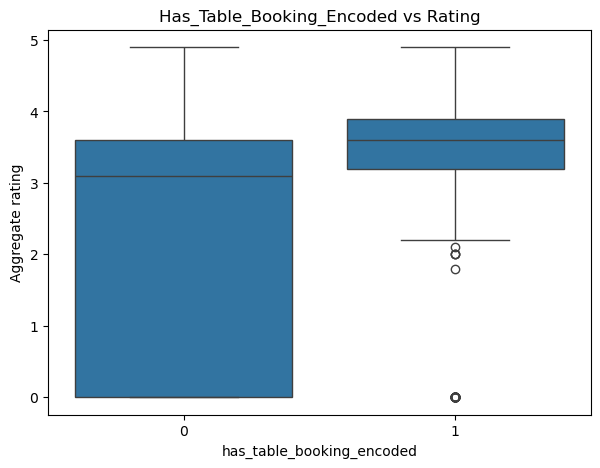

In [58]:
plt.figure(figsize=(7,5))
sns.boxplot(x='has_table_booking_encoded', y='Aggregate rating', data=df)
plt.title("Has_Table_Booking_Encoded vs Rating")
plt.show()

# Project Report:
         
               * Histogram shows the distribution of ratings

               * Boxplot identifies outliers

               * Bar charts compare average ratings of cuisines and cities

               * Scatter plots show relationships (votes vs rating)

               * Box plots show category impact (price range, booking, delivery)